# DACON 여행 상품 신청 여부 예측 경진대회
- id : 샘플 아이디
- Age : 나이
- TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
- DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
- Occupation : 직업
- Gender : 성별
- NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
- NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
- ProductPitched : 영업 사원이 제시한 상품
- PreferredPropertyStar : 선호 호텔 숙박업소 등급
- MaritalStatus : 결혼여부
- NumberOfTrips : 평균 연간 여행 횟수
- Passport : 여권 보유 여부 (0: 없음, 1: 있음)
- PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
- OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
- NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
- Designation : (직업의) 직급
- MonthlyIncome : 월 급여
- ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

In [27]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df_train_org = pd.read_csv('./data/train.csv')
df_test_org = pd.read_csv('./data/test.csv')

In [29]:
df_train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [30]:
df_train_org.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

## 결측치 처리
상관관계에 따라 결측치 처리  
- Age : 평균나이
- TypeofContact : 'Unknown'
- DurationOfPitch : duration 평균값
- NumberOfFollowups : 평균
- NumberOfTrips : passport가 있으면 평균 없으면 0
- NumberOfChildrenVisiting : 아이가 없어서 응답안함으로 보고 0
- MonthlyIncome : occupation 별 평균값

In [55]:
# null값을 가지고 있는 행 확인
df_train_null = df_train_org[df_train.isnull().sum(1)>0]
df_train_null

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
8,9,36.0,Company Invited,3,NaN,Small Business,Female,2,1.0,Deluxe,5.0,Divorced,3.0,0,1,1,0.0,Manager,19639.0,0
13,14,NaN,Self Enquiry,3,6.0,Small Business,Male,2,1.0,Deluxe,5.0,Married,2.0,0,4,0,0.0,Manager,NaN,0
14,15,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,1924,NaN,Company Invited,3,16.0,Salaried,Male,2,3.0,Deluxe,3.0,Married,2.0,1,1,1,1.0,Manager,NaN,0
1926,1927,53.0,Self Enquiry,3,10.0,Small Business,Male,3,5.0,Super Deluxe,5.0,Divorced,3.0,0,5,1,NaN,AVP,35534.0,0
1927,1928,50.0,Company Invited,1,17.0,Salaried,Female,3,4.0,King,5.0,Single,NaN,1,3,0,1.0,VP,37343.0,0
1946,1947,43.0,Company Invited,1,NaN,Small Business,Female,3,2.0,Basic,3.0,Single,5.0,0,3,0,2.0,Executive,19739.0,0


<AxesSubplot:>

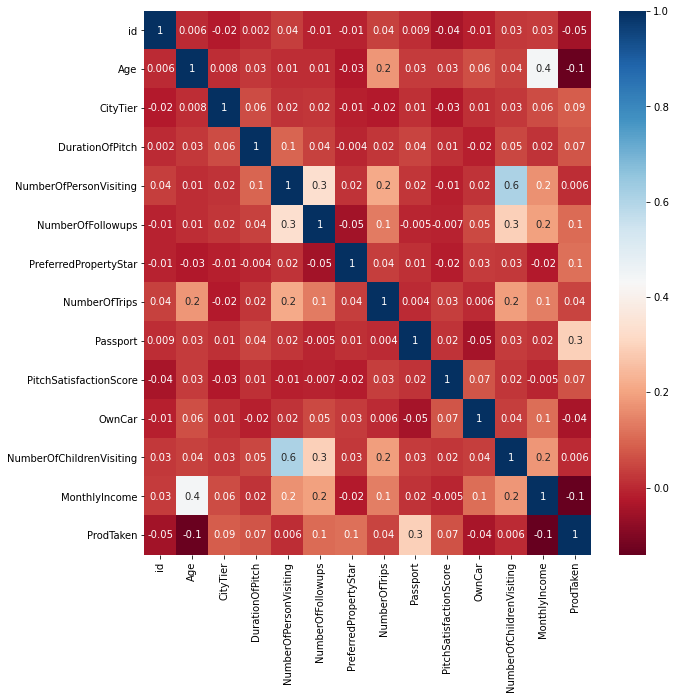

In [33]:
plt.figure(figsize=(10, 10))
corr = df_train_org.corr()
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.1g')

In [180]:
df_train = df_train_org.copy()
df_test = df_test_org.copy()

In [181]:
# 오류값 처리
df_train['Gender'].replace('Fe Male', 'Female', inplace=True)
df_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [187]:
# 결측치 처리
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean(skipna=True))
df_train['TypeofContact'] = df_train['TypeofContact'].fillna('Unknown')
df_train['DurationOfPitch'] = df_train['DurationOfPitch'].fillna(df_train['DurationOfPitch'].mean(skipna=True))
df_train['NumberOfFollowups'] = df_train['NumberOfFollowups'].fillna(df_train['NumberOfFollowups'].mean(skipna=True))
df_train['PreferredPropertyStar'] = df_train['PreferredPropertyStar'].fillna(df_train['PreferredPropertyStar'].mean())
df_train['NumberOfChildrenVisiting'] = df_train['NumberOfChildrenVisiting'].fillna(0)
df_train['NumberOfTrips'] = np.where(df_train['Passport']>0, df_train['NumberOfTrips'].fillna(df_train['NumberOfTrips'].mean(skipna=True)), df_train['NumberOfTrips'].fillna(0))
df_train['MonthlyIncome'] = df_train['MonthlyIncome'].fillna(df_train.groupby('Occupation')['MonthlyIncome'].transform('mean'))

In [188]:
df_train.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [194]:
plt.figure(figsize=(20, 10))

for i in range(4):
    for j in range(5):
        col = df_train.columns[i*j]
        
        import pdb
        pdb.set_trace()
        
        sns.countplot(x=col, ax=[i][j])
        
    ax[i][j].set(title=col)

> <ipython-input-194-bc54e19f9622>(10)<module>()
      8         pdb.set_trace()
      9 
---> 10         sns.countplot(x=col, ax=[i][j])
     11 
     12     ax[i][j].set(title=col)



ipdb>  col


'id'


ipdb>  i


0


ipdb>  j


*** The 'jump' command requires a line number


ipdb>  q


BdbQuit: 

<Figure size 1440x720 with 0 Axes>

0    1572
1     383
Name: ProdTaken, dtype: int64


<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

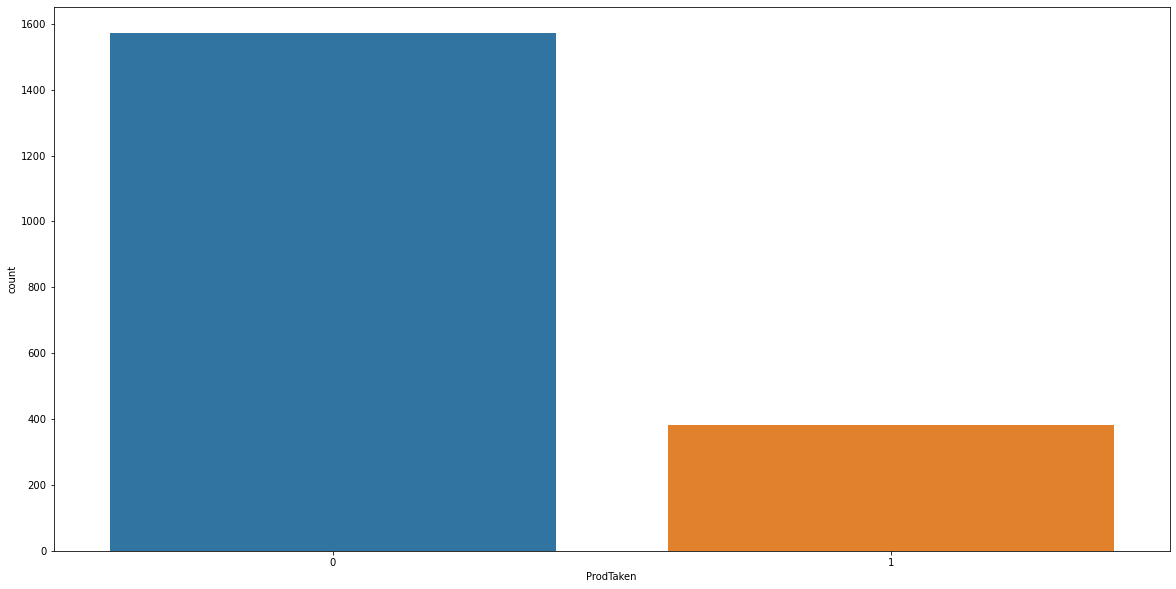

In [6]:
print(df_train['ProdTaken'].value_counts())
plt.figure(figsize=(20, 10))
sns.countplot(x='ProdTaken', data=df_train)

In [42]:
print('Type of Contact')
print(df_train['TypeofContact'].value_counts())
print()
print('City Tier')
print(df_train['CityTier'].value_counts())
print()
print('Occupation')
print(df_train['Occupation'].value_counts())
print()
print('Gender')
print(df_train['Gender'].value_counts())
print()
print('Number Of Person Visiting')
print(df_train['NumberOfPersonVisiting'].value_counts())
print()
print('Number Of Followups')
print(df_train['NumberOfFollowups'].value_counts())
print()
print('Product Pitched')
print(df_train['ProductPitched'].value_counts())
print()
print('Preferred Property Star')
print(df_train['PreferredPropertyStar'].value_counts())
print()
print('Marital Status')
print(df_train['MaritalStatus'].value_counts())
print()
print('Number Of Trips')
print(df_train['NumberOfTrips'].value_counts())

Type of Contact
Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

City Tier
1    1283
3     582
2      90
Name: CityTier, dtype: int64

Occupation
Salaried          965
Small Business    826
Large Business    163
Free Lancer         1
Name: Occupation, dtype: int64

Gender
Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

Number Of Person Visiting
3    988
2    543
4    412
1     11
5      1
Name: NumberOfPersonVisiting, dtype: int64

Number Of Followups
4.0    831
3.0    571
5.0    330
2.0     89
1.0     74
6.0     47
Name: NumberOfFollowups, dtype: int64

Product Pitched
Basic           745
Deluxe          689
Standard        302
Super Deluxe    130
King             89
Name: ProductPitched, dtype: int64

Preferred Property Star
3.0    1212
5.0     373
4.0     360
Name: PreferredPropertyStar, dtype: int64

Marital Status
Married      949
Divorced     375
Single       349
Unmarried    282
Name: MaritalStatus, dtype: int64

Numb

<AxesSubplot:xlabel='Age', ylabel='count'>

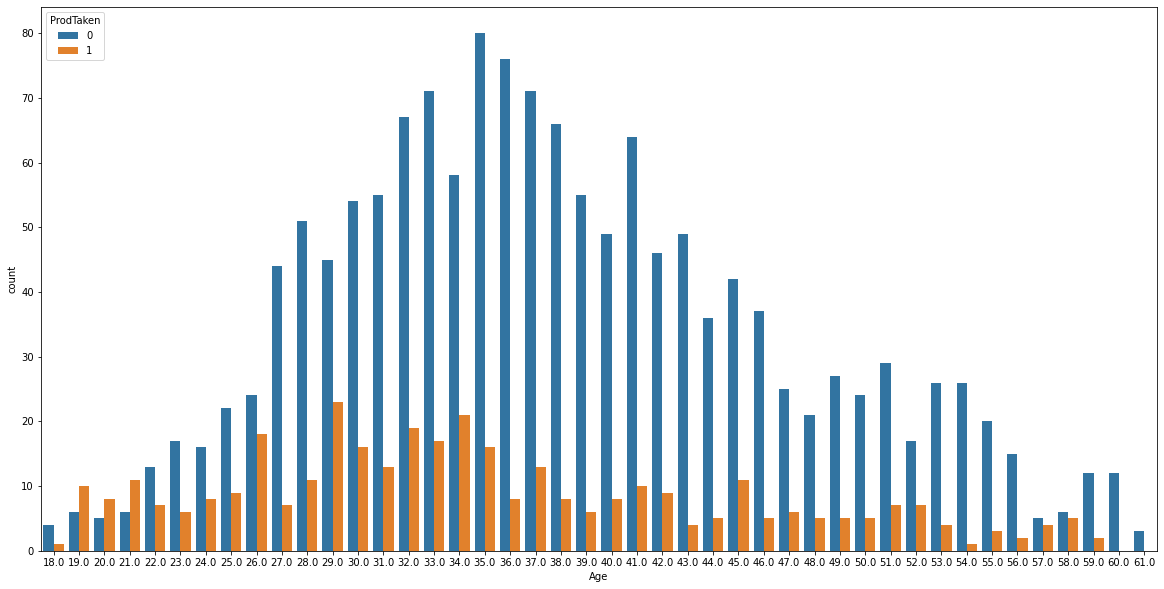

In [35]:
# 여행상품 구매에 따른 상관관계
plt.figure(figsize=(20, 10))
sns.countplot(x='Age', hue='ProdTaken', data=df_train)

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

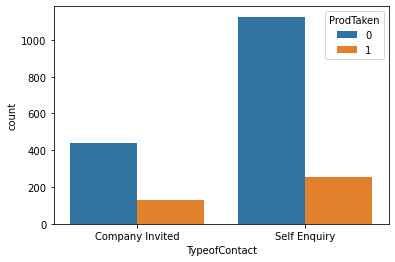

In [36]:
sns.countplot(x='TypeofContact', hue='ProdTaken', data=df_train)

<AxesSubplot:xlabel='CityTier', ylabel='count'>

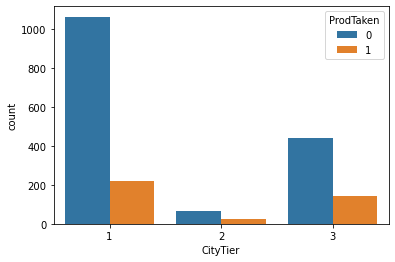

In [37]:
sns.countplot(x='CityTier', hue='ProdTaken', data=df_train)

<AxesSubplot:xlabel='DurationOfPitch', ylabel='count'>

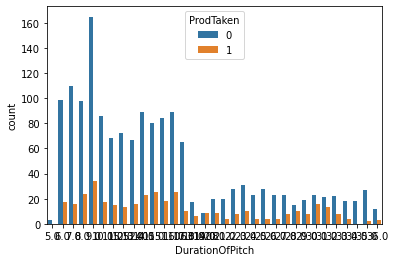

In [189]:
sns.countplot(x='DurationOfPitch', hue='ProdTaken', data=df_train)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

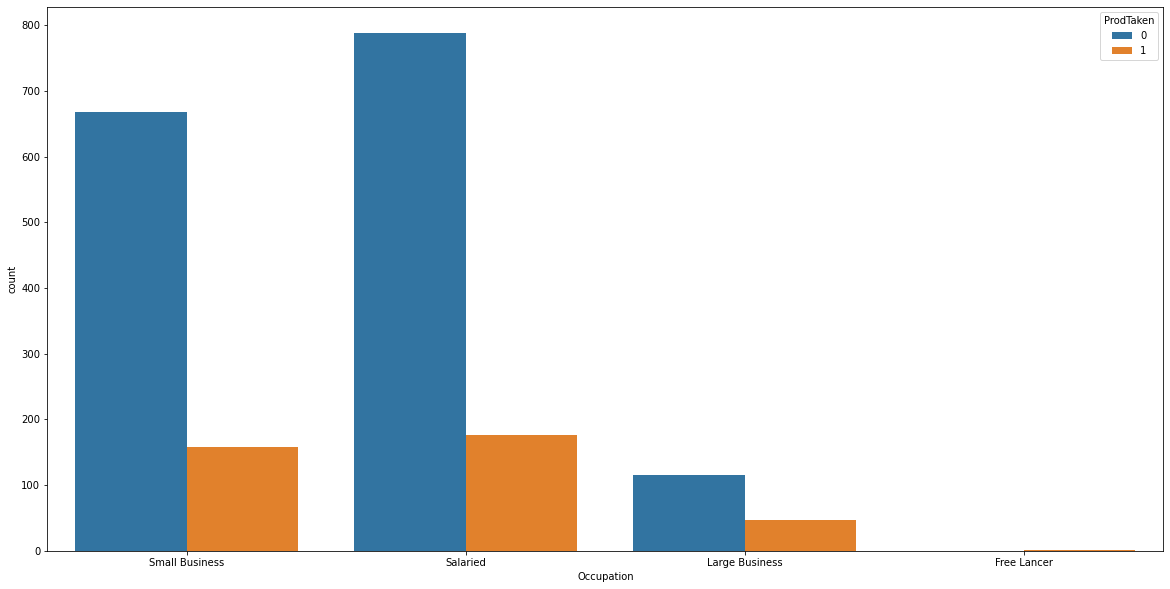

In [40]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Occupation', hue='ProdTaken', data=df_train)

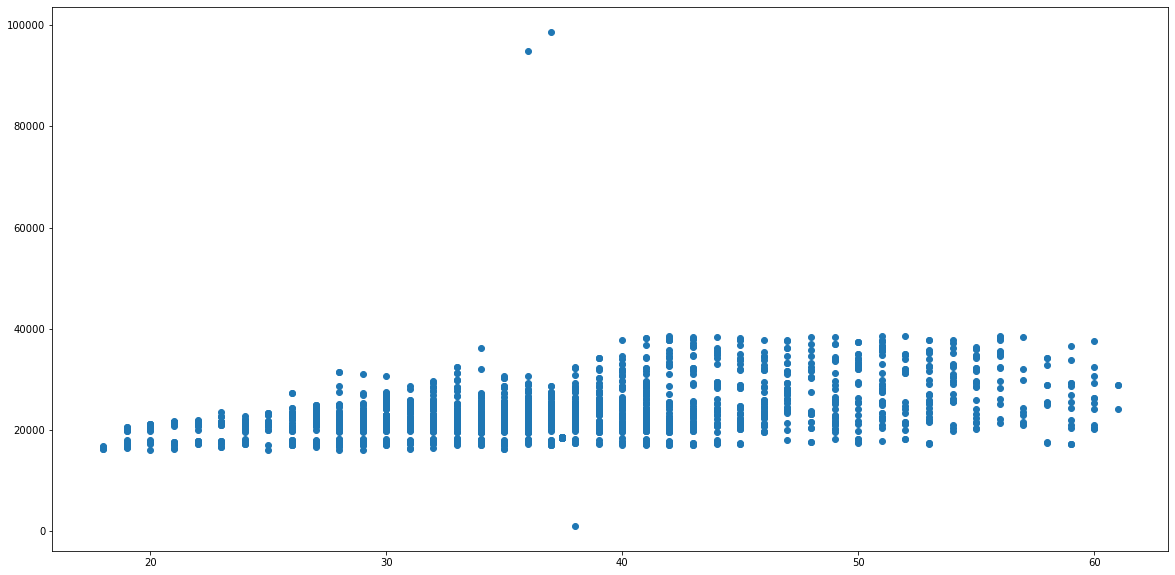

In [41]:
plt.figure(figsize=(20, 10))
plt.scatter(x=df_train.Age, y=df_train.MonthlyIncome)

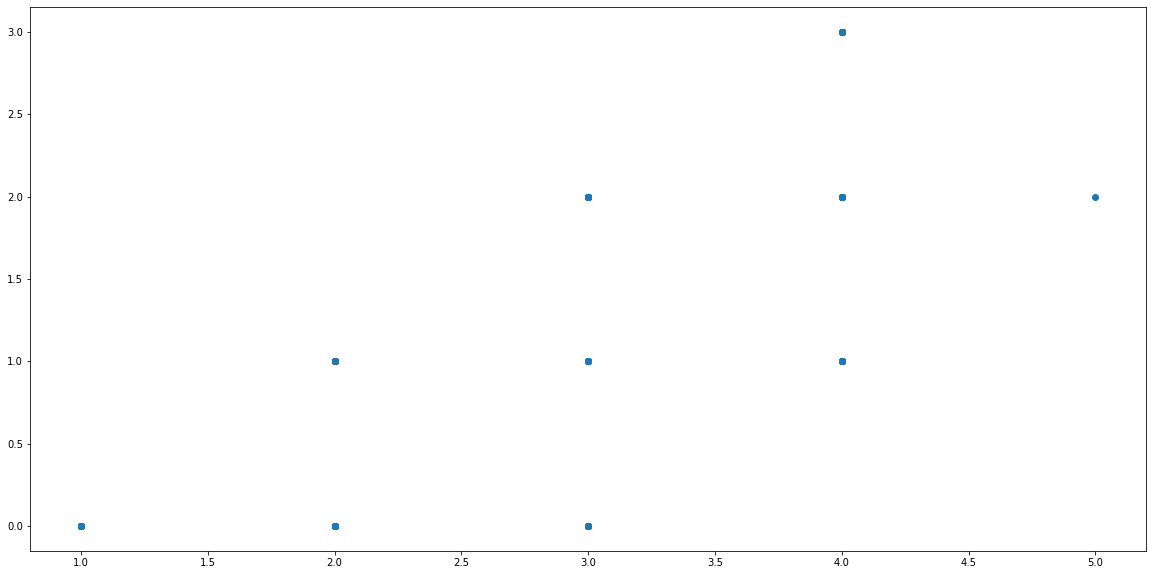

In [42]:
plt.figure(figsize=(20, 10))
plt.scatter(x=df_train.NumberOfPersonVisiting, y=df_train.NumberOfChildrenVisiting)

(array([367., 385., 280., 396.,  70., 101.,  86.,  83., 103.,  84.]),
 array([ 5. ,  8.1, 11.2, 14.3, 17.4, 20.5, 23.6, 26.7, 29.8, 32.9, 36. ]),
 <BarContainer object of 10 artists>)

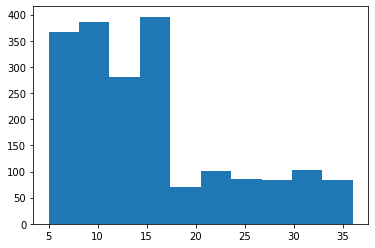

In [46]:
plt.hist(df_train['DurationOfPitch'])

## DACON 제출

In [79]:
submission = pd.read_csv('./dataset/sample_submission.csv')
submission['label'] = model_pred
submission

,file_name,label
0,001.PNG,7
1,002.PNG,1
2,003.PNG,9
3,004.PNG,7
4,005.PNG,6
...,...,...
194,195.PNG,0
195,196.PNG,1
196,197.PNG,1
197,198.PNG,9


In [80]:
submission.to_csv('./dataset/submission.csv', index=False)